In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\xampp\htdocs\malicious-web-content-detection-using-random-forest\Training-Dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\udita bista\\Documents\\Major Project\\Algorithm\\Training-Dataset.csv'

In [106]:
X = df.drop('target', axis=1)
y = df['target']

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

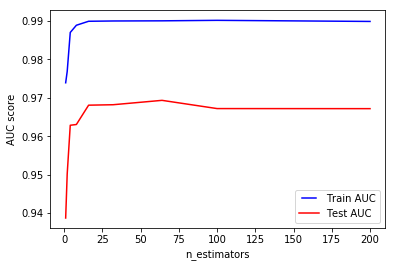

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results =[]

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate,true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b",label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

In [109]:
rf = RandomForestClassifier(n_estimators = 16, verbose= True)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=1,
            oob_score=False, random_state=None, verbose=True,
            warm_start=False)

In [110]:
print("\n\n ""Random Forest Algorithm Results"" ")
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



 Random Forest Algorithm Results 
Feature ranking:
1. feature 7 (0.278148)
2. feature 13 (0.230006)
3. feature 25 (0.078112)
4. feature 6 (0.077097)
5. feature 5 (0.055733)
6. feature 14 (0.043936)
7. feature 12 (0.027318)
8. feature 15 (0.026473)
9. feature 28 (0.019340)
10. feature 23 (0.019032)
11. feature 8 (0.017723)
12. feature 24 (0.014474)
13. feature 27 (0.014087)
14. feature 0 (0.012898)
15. feature 26 (0.012436)
16. feature 1 (0.008787)
17. feature 11 (0.007040)
18. feature 3 (0.006465)
19. feature 16 (0.006383)
20. feature 2 (0.005999)
21. feature 18 (0.005716)
22. feature 29 (0.005398)
23. feature 17 (0.005373)
24. feature 21 (0.005004)
25. feature 19 (0.003739)
26. feature 9 (0.003695)
27. feature 4 (0.003277)
28. feature 22 (0.002616)
29. feature 10 (0.002572)
30. feature 20 (0.001124)


In [111]:
#Patterns

In [112]:
ipv4_pattern = r"^(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$"
ipv6_pattern = r"^(?:(?:(?:(?:(?:(?:(?:[0-9a-fA-F]{1,4})):){6})(?:(?:(?:(?:(?:[0-9a-fA-F]{1,4})):" \
               r"(?:(?:[0-9a-fA-F]{1,4})))|(?:(?:(?:(?:(?:25[0-5]|(?:[1-9]|1[0-9]|2[0-4])?[0-9]))\.){3}" \
               r"(?:(?:25[0-5]|(?:[1-9]|1[0-9]|2[0-4])?[0-9])))))))|(?:(?:::(?:(?:(?:[0-9a-fA-F]{1,4})):){5})" \
               r"(?:(?:(?:(?:(?:[0-9a-fA-F]{1,4})):(?:(?:[0-9a-fA-F]{1,4})))|(?:(?:(?:(?:(?:25[0-5]|" \
               r"(?:[1-9]|1[0-9]|2[0-4])?[0-9]))\.){3}(?:(?:25[0-5]|(?:[1-9]|1[0-9]|2[0-4])?[0-9])))))))|" \
               r"(?:(?:(?:(?:(?:[0-9a-fA-F]{1,4})))?::(?:(?:(?:[0-9a-fA-F]{1,4})):){4})" \
               r"(?:(?:(?:(?:(?:[0-9a-fA-F]{1,4})):(?:(?:[0-9a-fA-F]{1,4})))|(?:(?:(?:(?:(?:25[0-5]|" \
               r"(?:[1-9]|1[0-9]|2[0-4])?[0-9]))\.){3}(?:(?:25[0-5]|(?:[1-9]|1[0-9]|2[0-4])?[0-9])))))))|" \
               r"(?:(?:(?:(?:(?:(?:[0-9a-fA-F]{1,4})):){0,1}(?:(?:[0-9a-fA-F]{1,4})))?::" \
               r"(?:(?:(?:[0-9a-fA-F]{1,4})):){3})(?:(?:(?:(?:(?:[0-9a-fA-F]{1,4})):(?:(?:[0-9a-fA-F]{1,4})))|" \
               r"(?:(?:(?:(?:(?:25[0-5]|(?:[1-9]|1[0-9]|2[0-4])?[0-9]))\.){3}" \
               r"(?:(?:25[0-5]|(?:[1-9]|1[0-9]|2[0-4])?[0-9])))))))|(?:(?:(?:(?:(?:(?:[0-9a-fA-F]{1,4})):){0,2}" \
               r"(?:(?:[0-9a-fA-F]{1,4})))?::(?:(?:(?:[0-9a-fA-F]{1,4})):){2})(?:(?:(?:(?:(?:[0-9a-fA-F]{1,4})):" \
               r"(?:(?:[0-9a-fA-F]{1,4})))|(?:(?:(?:(?:(?:25[0-5]|(?:[1-9]|1[0-9]|2[0-4])?[0-9]))\.){3}(?:(?:25[0-5]|" \
               r"(?:[1-9]|1[0-9]|2[0-4])?[0-9])))))))|(?:(?:(?:(?:(?:(?:[0-9a-fA-F]{1,4})):){0,3}" \
               r"(?:(?:[0-9a-fA-F]{1,4})))?::(?:(?:[0-9a-fA-F]{1,4})):)(?:(?:(?:(?:(?:[0-9a-fA-F]{1,4})):" \
               r"(?:(?:[0-9a-fA-F]{1,4})))|(?:(?:(?:(?:(?:25[0-5]|(?:[1-9]|1[0-9]|2[0-4])?[0-9]))\.){3}" \
               r"(?:(?:25[0-5]|(?:[1-9]|1[0-9]|2[0-4])?[0-9])))))))|(?:(?:(?:(?:(?:(?:[0-9a-fA-F]{1,4})):){0,4}" \
               r"(?:(?:[0-9a-fA-F]{1,4})))?::)(?:(?:(?:(?:(?:[0-9a-fA-F]{1,4})):(?:(?:[0-9a-fA-F]{1,4})))|" \
               r"(?:(?:(?:(?:(?:25[0-5]|(?:[1-9]|1[0-9]|2[0-4])?[0-9]))\.){3}(?:(?:25[0-5]|" \
               r"(?:[1-9]|1[0-9]|2[0-4])?[0-9])))))))|(?:(?:(?:(?:(?:(?:[0-9a-fA-F]{1,4})):){0,5}" \
               r"(?:(?:[0-9a-fA-F]{1,4})))?::)(?:(?:[0-9a-fA-F]{1,4})))|(?:(?:(?:(?:(?:(?:[0-9a-fA-F]{1,4})):){0,6}" \
               r"(?:(?:[0-9a-fA-F]{1,4})))?::))))$"
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"
http_https = r"https://|http://"

In [113]:
#FEATURE EXTRACTION

In [114]:
from bs4 import BeautifulSoup
import urllib
import bs4
import re
import socket
import whois
from datetime import datetime
import time

from googlesearch import search

import sys

from patterns import *

In [115]:
LOCALHOST_PATH = "C:/xammp/htdocs/"
DIRECTORY_NAME = "malicious-web-content-detection-using-random-forest"

In [116]:
def having_ip_address(url):
    ip_address_pattern = ipv4_pattern + "|" + ipv6_pattern
    match = re.search(ip_address_pattern, url)
    return -1 if match else 1

In [117]:
def url_length(url):
    if len(url) < 54:
        return 1
    if 54 <= len(url) <= 75:
        return 0
    return -1

In [118]:
def shortening_service(url):
    match = re.search(shortening_services, url)
    return -1 if match else 1

In [119]:
def having_at_symbol(url):
    match = re.search('@', url)
    return -1 if match else 1


In [120]:
def double_slash_redirecting(url):

    last_double_slash = url.rfind('//')
    return -1 if last_double_slash > 6 else 1


In [121]:
def prefix_suffix(domain):
    match = re.search('-', domain)
    return -1 if match else 1

In [122]:
def having_sub_domain(url):

    if having_ip_address(url) == -1:
        match = re.search(
            '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
            '([01]?\\d\\d?|2[0-4]\\d|25[0-5]))|(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}',
            url)
        pos = match.end()
        url = url[pos:]
    num_dots = [x.start() for x in re.finditer(r'\.', url)]
    if len(num_dots) <= 3:
        return 1
    elif len(num_dots) == 4:
        return 0
    else:
        return -1

In [123]:
def domain_registration_length(domain):
    expiration_date = domain.expiration_date
    today = time.strftime('%Y-%m-%d')
    today = datetime.strptime(today, '%Y-%m-%d')

    registration_length = 0

    if expiration_date:
        registration_length = abs((expiration_date - today).days)
    return -1 if registration_length / 365 <= 1 else 1

In [124]:
def favicon(wiki, soup, domain):
    for head in soup.find_all('head'):
        for head.link in soup.find_all('link', href=True):
            dots = [x.start() for x in re.finditer(r'\.', head.link['href'])]
            return 1 if wiki in head.link['href'] or len(dots) == 1 or domain in head.link['href'] else -1
    return 1

In [125]:
def https_token(url):
    match = re.search(http_https, url)
    if match and match.start() == 0:
        url = url[match.end():]
    match = re.search('http|https', url)
    return -1 if match else 1

In [126]:
def request_url(wiki, soup, domain):
    i = 0
    success = 0
    for img in soup.find_all('img', src=True):
        dots = [x.start() for x in re.finditer(r'\.', img['src'])]
        if wiki in img['src'] or domain in img['src'] or len(dots) == 1:
            success = success + 1
        i = i + 1

    for audio in soup.find_all('audio', src=True):
        dots = [x.start() for x in re.finditer(r'\.', audio['src'])]
        if wiki in audio['src'] or domain in audio['src'] or len(dots) == 1:
            success = success + 1
        i = i + 1

    for embed in soup.find_all('embed', src=True):
        dots = [x.start() for x in re.finditer(r'\.', embed['src'])]
        if wiki in embed['src'] or domain in embed['src'] or len(dots) == 1:
            success = success + 1
        i = i + 1

    for i_frame in soup.find_all('i_frame', src=True):
        dots = [x.start() for x in re.finditer(r'\.', i_frame['src'])]
        if wiki in i_frame['src'] or domain in i_frame['src'] or len(dots) == 1:
            success = success + 1
        i = i + 1

    try:
        percentage = success / float(i) * 100
    except:
        return 1

    if percentage < 22.0:
        return 1
    elif 22.0 <= percentage < 61.0:
        return 0
    else:
        return -1

In [127]:
def url_of_anchor(wiki, soup, domain):
    i = 0
    unsafe = 0
    for a in soup.find_all('a', href=True):
        if "#" in a['href'] or "javascript" in a['href'].lower() or "mailto" in a['href'].lower() or not (
                wiki in a['href'] or domain in a['href']):
            unsafe = unsafe + 1
        i = i + 1
    
    try:
        percentage = unsafe / float(i) * 100
    except:
        return 1
    if percentage < 31.0:
        return 1
    
    elif 31.0 <= percentage < 67.0:
        return 0
    else:
        return -1

In [128]:
def links_in_tags(wiki, soup, domain):
    i = 0
    success = 0
    for link in soup.find_all('link', href=True):
        dots = [x.start() for x in re.finditer(r'\.', link['href'])]
        if wiki in link['href'] or domain in link['href'] or len(dots) == 1:
            success = success + 1
        i = i + 1

    for script in soup.find_all('script', src=True):
        dots = [x.start() for x in re.finditer(r'\.', script['src'])]
        if wiki in script['src'] or domain in script['src'] or len(dots) == 1:
            success = success + 1
        i = i + 1
    try:
        percentage = success / float(i) * 100
    except:
        return 1

    if percentage < 17.0:
        return 1
    elif 17.0 <= percentage < 81.0:
        return 0
    else:
        return -1

In [129]:
def sfh(wiki, soup, domain):
    for form in soup.find_all('form', action=True):
        if form['action'] == "" or form['action'] == "about:blank":
            return -1
        elif wiki not in form['action'] and domain not in form['action']:
            return 0
        else:
            return 1
    return 1

In [130]:
def submitting_to_email(soup):
    for form in soup.find_all('form', action=True):
        return -1 if "mailto:" in form['action'] else 1

    return 1

In [131]:
def abnormal_url(domain, url):
    hostname = domain.name
    match = re.search(hostname, url)
    return 1 if match else -1

In [132]:
def i_frame(soup):
    for i_frame in soup.find_all('i_frame', width=True, height=True, frameBorder=True):

        if i_frame['width'] == "0" and i_frame['height'] == "0" and i_frame['frameBorder'] == "0":
            return -1
        if i_frame['width'] == "0" or i_frame['height'] == "0" or i_frame['frameBorder'] == "0":
            return 0

    return 1

In [133]:
def age_of_domain(domain):
    creation_date = domain.creation_date
    expiration_date = domain.expiration_date
    ageofdomain = 0
    if expiration_date:
        ageofdomain = abs((expiration_date - creation_date).days)
    return -1 if ageofdomain / 30 < 6 else 1

In [134]:
def web_traffic(url):
    try:
        rank = \
            bs4.BeautifulSoup(urllib.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find(
                "REACH")['RANK']
    except TypeError:
        return -1
    rank = int(rank)
    return 1 if rank < 100000 else 0

In [135]:
def google_index(url):
    site = search(url, 5)
    return 1 if site else -1

In [136]:
def statistical_report(url, hostname):
    try:
        ip_address = socket.gethostbyname(hostname)
    except:
        return -1
    url_match = re.search(
        r'at\.ua|usa\.cc|baltazarpresentes\.com\.br|pe\.hu|esy\.es|hol\.es|sweddy\.com|myjino\.ru|96\.lt|ow\.ly', url)
    ip_match = re.search(
        '146\.112\.61\.108|213\.174\.157\.151|121\.50\.168\.88|192\.185\.217\.116|78\.46\.211\.158|181\.174\.165\.13|46\.242\.145\.103|121\.50\.168\.40|83\.125\.22\.219|46\.242\.145\.98|'
        '107\.151\.148\.44|107\.151\.148\.107|64\.70\.19\.203|199\.184\.144\.27|107\.151\.148\.108|107\.151\.148\.109|119\.28\.52\.61|54\.83\.43\.69|52\.69\.166\.231|216\.58\.192\.225|'
        '118\.184\.25\.86|67\.208\.74\.71|23\.253\.126\.58|104\.239\.157\.210|175\.126\.123\.219|141\.8\.224\.221|10\.10\.10\.10|43\.229\.108\.32|103\.232\.215\.140|69\.172\.201\.153|'
        '216\.218\.185\.162|54\.225\.104\.146|103\.243\.24\.98|199\.59\.243\.120|31\.170\.160\.61|213\.19\.128\.77|62\.113\.226\.131|208\.100\.26\.234|195\.16\.127\.102|195\.16\.127\.157|'
        '34\.196\.13\.28|103\.224\.212\.222|172\.217\.4\.225|54\.72\.9\.51|192\.64\.147\.141|198\.200\.56\.183|23\.253\.164\.103|52\.48\.191\.26|52\.214\.197\.72|87\.98\.255\.18|209\.99\.17\.27|'
        '216\.38\.62\.18|104\.130\.124\.96|47\.89\.58\.141|78\.46\.211\.158|54\.86\.225\.156|54\.82\.156\.19|37\.157\.192\.102|204\.11\.56\.48|110\.34\.231\.42',
        ip_address)
    if url_match:
        return -1
    elif ip_match:
        return -1
    else:
        return 1

In [3]:
def get_hostname_from_url(url):
    hostname = url

    pattern = "https://|http://|www.|https://www.|http://www."
    pre_pattern_match = re.search(pattern, hostname)

    if pre_pattern_match:
        hostname = hostname[pre_pattern_match.end():]
        post_pattern_match = re.search("/", hostname)
        if post_pattern_match:
            hostname = hostname[:post_pattern_match.start()]

    return hostname

    hostname = get_hostname_from_url('https://www.google.com')
    print(hostname)
    domain = whois.query(hostname)
    print(domain)

In [138]:
def main(url):
    # with open(LOCALHOST_PATH + DIRECTORY_NAME + '/markup.txt', 'r') as file:
    #     soup_string = file.read()

    # soup = BeautifulSoup(soup_string, 'html.parser')

    status = []
    hostname = get_hostname_from_url(url)

    status.append(having_ip_address(url))
    status.append(url_length(url))
    status.append(shortening_service(url))
    status.append(having_at_symbol(url))
    status.append(double_slash_redirecting(url))
    status.append(prefix_suffix(hostname))
    status.append(having_sub_domain(url))

    dns = 1
    try:
        domain = whois.query(hostname)
    except:
        dns = -1

    status.append(-1 if dns == -1 else domain_registration_length(domain))

    # status.append(favicon(url, soup, hostname))
    status.append(https_token(url))
    # status.append(request_url(url, soup, hostname))
    # status.append(url_of_anchor(url, soup, hostname))
    # status.append(links_in_tags(url, soup, hostname))
    # status.append(sfh(url, soup, hostname))
    # status.append(submitting_to_email(soup))

    status.append(-1 if dns == -1 else abnormal_url(domain, url))

    # status.append(i_frame(soup))

    status.append(-1 if dns == -1 else age_of_domain(domain))

    status.append(dns)

    # status.append(web_traffic(soup))
    status.append(google_index(url))
    status.append(statistical_report(url, hostname))

    print('\n1. Having IP address\n2. URL Length\n3. URL Shortening service\n4. Having @ symbol\n'
          '5. Having double slash\n6. Having dash symbol(Prefix Suffix)\n7. Having multiple subdomains\n'
          '8. SSL Final State\n8. Domain Registration Length\n9. Favicon\n10. HTTP or HTTPS token in domain name\n'
          '11. Request URL\n12. URL of Anchor\n13. Links in tags\n14. SFH\n15. Submitting to email\n16. Abnormal URL\n'
          '17. IFrame\n18. Age of Domain\n19. DNS Record\n20. Web Traffic\n21. Google Index\n22. Statistical Reports\n')
    print(status)
    return status

if __name__ == "__main__":
    main(sys.argv[1])


1. Having IP address
2. URL Length
3. URL Shortening service
4. Having @ symbol
5. Having double slash
6. Having dash symbol(Prefix Suffix)
7. Having multiple subdomains
8. SSL Final State
8. Domain Registration Length
9. Favicon
10. HTTP or HTTPS token in domain name
11. Request URL
12. URL of Anchor
13. Links in tags
14. SFH
15. Submitting to email
16. Abnormal URL
17. IFrame
18. Age of Domain
19. DNS Record
20. Web Traffic
21. Google Index
22. Statistical Reports

[1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1]


In [142]:
import joblib

import sys
import numpy as np




def get_prediction_from_url(test_url):
    features_test = features_extraction.main(test_url)
    # Due to updates to scikit-learn, we now need a 2D array as a parameter to the predict function.
    features_test = np.array(features_test).reshape((1, -1))

    clf = joblib.load(r'classifier/random_forest.pkl')

    pred = clf.predict(features_test)
    return int(pred[0])




In [141]:
def main():
    url = sys.argv[1]

    prediction = get_prediction_from_url(url)

    # Print the probability of prediction (if needed)
    # prob = clf.predict_proba(features_test)
    # print 'Features=', features_test, 'The predicted probability is - ', prob, 'The predicted label is - ', pred
    #    print "The probability of this site being a phishing website is ", features_test[0]*100, "%"

    if prediction == 1:
        # print "The website is safe to browse"
        print("SAFE")
    elif prediction == -1:
        # print "The website has phishing features. DO NOT VISIT!"
        print("PHISHING")

        # print 'Error -', features_test


if __name__ == "__main__":
    main()



FileNotFoundError: [Errno 2] No such file or directory: 'C:/xammp/htdocs/malicious-web-content-detection-using-random-forest/markup.txt'

In [72]:
import unittest
from features_extraction import *



class TestFeaturesExtraction(unittest.TestCase):
    def test_having_ip_address(self):
        ipv4_address = "172.11.141.23"
        ipv6_address_1 = "fe80:0:0:0:204:61ff:fe9d:f156"
        ipv6_address_2 = "fe80::204:61ff:fe9d:f156"
        ipv6_address_3 = "fe80:0000:0000:0000:0204:61ff:fe9d:f156"
        ipv6_address_4 = "fe80:0:0:0:0204:61ff:254.157.241.86"
        url_1 = "www.google.com"
        url_2 = "888.com"

        # IP address cases
        self.assertEqual(having_ip_address(ipv4_address), -1, "Given input URL has an IP address.")
        self.assertEqual(having_ip_address(ipv6_address_1), -1, "Given input URL has an IP address.")
        self.assertEqual(having_ip_address(ipv6_address_2), -1, "Given input URL has an IP address.")
        self.assertEqual(having_ip_address(ipv6_address_3), -1, "Given input URL has an IP address.")
        self.assertEqual(having_ip_address(ipv6_address_4), -1, "Given input URL has an IP address.")

        # Non IP address cases
        self.assertEqual(having_ip_address(url_1), 1, "Given input URL does not have an IP address.")
        self.assertEqual(having_ip_address(url_2), 1, "Given input URL does not have an IP address.")

    def test_shortening_services(self):
        url_1 = "bit.ly/akhd9a9"
        url_2 = "http://goo.gl/shan78a"
        url_3 = "https://github.com/philomathic-guy"
        url_4 = "tr.im/adsfaj8"

        # Shortening services links
        self.assertEqual(shortening_service(url_1), -1, "Given input URL is a shortening service URL.")
        self.assertEqual(shortening_service(url_2), -1, "Given input URL is a shortening service URL.")
        self.assertEqual(shortening_service(url_4), -1, "Given input URL is a shortening service URL.")

        # Non-shortening services links
        self.assertEqual(shortening_service(url_3), 1, "Given input URL is a non-shortening service URL.")

    def test_url_length(self):
        # Short URL - Length 41.
        url_1 = "https://docs.python.org/2/library/re.html"
        # Long URL - Length - 73.
        url_2 = "https://github.com/philomathic-guy/Friend-recommendation-using-movie-data"
        # Longer URL - Length 79.
        url_3 = "https://myfunds.000webhostapp.com/new_now/8f66d5a47bf3ec8e6c1ag6s3dc770001a4bd/"

        self.assertEqual(url_length(url_1), 1, "The URL length is not suspicious.")
        self.assertEqual(url_length(url_2), 0, "The URL length is not suspicious.")
        self.assertEqual(url_length(url_3), -1, "The URL length is suspicious.")

    def test_having_at_symbol(self):
        url_1 = "https://docs.python.org/2/library/re.html"
        url_2 = "https://github.com/philomathic-guy/"

        self.assertEqual(having_at_symbol(url_1), 1)
        self.assertEqual(having_at_symbol(url_2), 1)

    def test_full_path(self):
        url_1 = "https://github.com/philomathic-guy/"

        self.assertEqual(get_prediction_from_url(url_1), 1)

    def test_domain_registration_length(self):
        url_1 = "https://github.com/philomathic-guy/"

        hostname_1 = get_hostname_from_url(url_1)
        try:
            domain_1 = whois.query(hostname_1)
            self.assertEqual(domain_registration_length(domain_1))
        except:
            pass

    def test_having_sub_domain(self):
        url_1 = "https://github.com/philomathic-guy/"
        url_2 = "https://www.spit.ac.in"

        self.assertEqual(having_sub_domain(url_1), 1)
        self.assertEqual(having_sub_domain(url_2), 1)


if __name__ == "__main__":
    unittest.main()



usage: ipykernel_launcher [-h] [-v] [-q] [--locals] [-f] [-c] [-b]
                          [tests [tests ...]]
ipykernel_launcher: error: argument -f/--failfast: ignored explicit argument 'C:\\Users\\UDITAB~1\\AppData\\Local\\Temp\\tmp-14444tTsdNb4XvJyB.json'


SystemExit: 2

In [73]:
%tb

SystemExit: 2